# Análisis de texto: Programa de Sebastián Piñera

In [74]:
#-*- coding: utf8 -*-
import nltk
import pandas as pd
import numpy as np
import PyPDF2
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

### Transformar PDF a texto

In [75]:
filename = 'programa-SP.pdf' 

#open allows you to read the file
pdfFileObj = open(filename,'rb')
#The pdfReader variable is a readable object that will be parsed
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#discerning the number of pages will allow us to parse through all #the pages
num_pages = pdfReader.numPages
count = 0
text = ""
#The while loop will read each page
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()


### Tokenization

In [76]:
tokenizer = RegexpTokenizer("[\w']+")

In [77]:
programa = tokenizer.tokenize(text)
n_tokens=len(programa)
tokens=[]
for i in range(0,n_tokens):
    tokens.append(programa[i].lower())

### Stemming and Lemmatization

Lamentablemente la librería nltk no permite aplicar lemmatization en español. Para solucionar esto ocuparemos un diccionario de lemas obtenido desde http://www.lexiconista.com/Datasets/lemmatization-es.zip.

In [6]:
#stemmer = nltk.stem.snowball.SnowballStemmer('spanish')

In [78]:
lemmaDict = {}
with open('lemmatization-es.txt', 'rb') as f:
    data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
    data = [a.split(u'\t') for a in data]

for a in data:
    if len(a) > 1:
        lemmaDict[a[1]] = a[0]

def lemmatize(word):
    return lemmaDict.get(word, word + u'*')

In [80]:
lemas = []
#print("Original   ->   Lema")
#print("--------------------")
#for word in tokens[:10]:
#    word_lema = lemmatize(word)
#    print("{}   ->   {}".format(word, word_lema))
for word in tokens:
    word_lema = lemmatize(word)
    lemas.append(word_lema)

## Análisis

#### Eliminar Stopwords

In [81]:
from nltk.corpus import stopwords
spanish = stopwords.words('spanish')
spanish.extend(['si', 'programa', 'ello','sistema','cada','sino','sido','hacia','sólo','parte',
                'caso','parir','comer','casar','mercar','asir','aguar'])

def remove_stopwords(tokens):
    filtro = [w for w in tokens if not w in spanish]
    return filtro

tokens_filtro = remove_stopwords(lemas)
tokens_filtro = [w.replace("*", "") for w in tokens_filtro]
tokens_filtro = [w.replace("programar", "programa") for w in tokens_filtro]
tokens_filtro = [w.replace("gobernar", "gobierno") for w in tokens_filtro]
tokens_filtro = [w.replace("desarrollar", "desarrollo") for w in tokens_filtro]
tokens_filtro = [w.replace("personar", "personas") for w in tokens_filtro]
tokens_filtro = [w.replace("libertar", "libertad") for w in tokens_filtro]

tokens_filtro = [w for w in tokens_filtro if len(w)>3]

#### Frecuencia de palabras

In [82]:
from nltk import FreqDist
dist_programa = FreqDist(tokens_filtro) 
most = dist_programa.most_common(10)
most
#dist_programa['economía']


[('desarrollo', 232),
 ('chile', 177),
 ('país', 176),
 ('nuevo', 173),
 ('público', 159),
 ('mejorar', 152),
 ('sistema', 152),
 ('político', 149),
 ('crear', 147),
 ('haber', 146)]

#### Wordcloud

In [83]:
from wordcloud import WordCloud
font_path = r'C:\Windows\Fonts\trebuc.ttf'
palabras_programa = ' '.join(tokens_filtro)
programa_wordcloud = WordCloud(stopwords=spanish, width=800, height=500, font_path=font_path, max_words=len(tokens_filtro), relative_scaling=0.4,min_font_size=8, background_color='white',random_state=4).generate(palabras_programa)

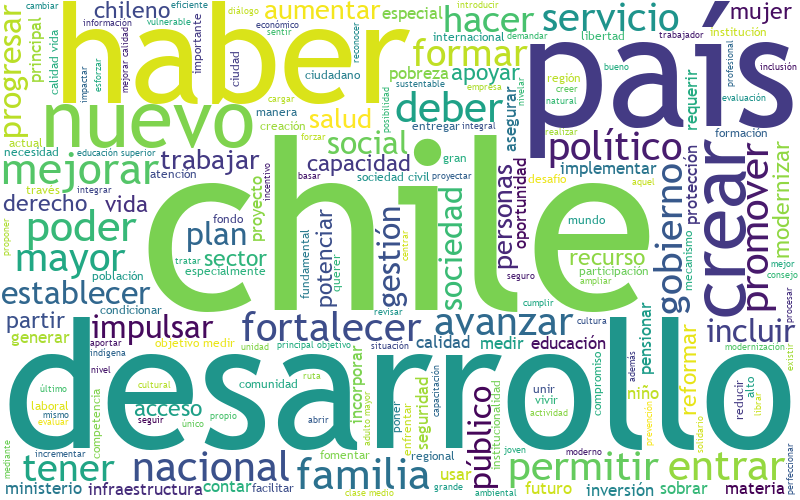

In [84]:
programa_wordcloud.to_image()

In [85]:
programa_wordcloud.to_file("nube_programa_sp.png")

#### N-Grams

In [86]:
from nltk.util import ngrams
from collections import Counter

In [87]:
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
#count_bigrams = Counter(bigrams)
#print(count_bigrams.most_common(50))

In [88]:
count_trigrams = Counter(trigrams)
print(count_trigrams.most_common(50))

[(('objetivos', 'y', 'medidas'), 39), (('el', 'desarrollo', 'de'), 33), (('calidad', 'de', 'vida'), 31), (('a', 'fin', 'de'), 31), (('la', 'calidad', 'de'), 30), (('la', 'sociedad', 'civil'), 30), (('principales', 'objetivos', 'y'), 27), (('a', 'través', 'de'), 27), (('el', 'sistema', 'de'), 24), (('de', 'la', 'sociedad'), 24), (('y', 'medidas', '1'), 24), (('un', 'sistema', 'de'), 24), (('el', 'acceso', 'a'), 23), (('de', 'forma', 'de'), 23), (('la', 'creación', 'de'), 22), (('de', 'la', 'educación'), 21), (('de', 'las', 'personas'), 20), (('calidad', 'de', 'la'), 19), (('la', 'educación', 'superior'), 19), (('de', 'la', 'población'), 19), (('a', 'la', 'educación'), 17), (('plan', 'nacional', 'de'), 17), (('en', 'materia', 'de'), 17), (('el', 'uso', 'de'), 17), (('programa', 'de', 'gobierno'), 16), (('de', 'la', 'república'), 16), (('a', 'las', 'familias'), 16), (('de', 'la', 'mujer'), 16), (('personas', 'con', 'discapacidad'), 15), (('de', 'sus', 'hijos'), 14), (('de', 'las', 'famili